## Marçenko-Pastur law

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex": True,"font.family": "STIXGeneral"})#,"font.sans-serif": "Helvetica",})

def marcenko_pastur(x, eta, lam1, lam2, sigma=1):
    if x > lam2 or x < lam1:
        return 0
    # if x < lam2 and x > lam1:
    return np.sqrt((lam2 - x) * (x - lam1)) / (eta * x * 2 * np.pi * sigma**2)
    


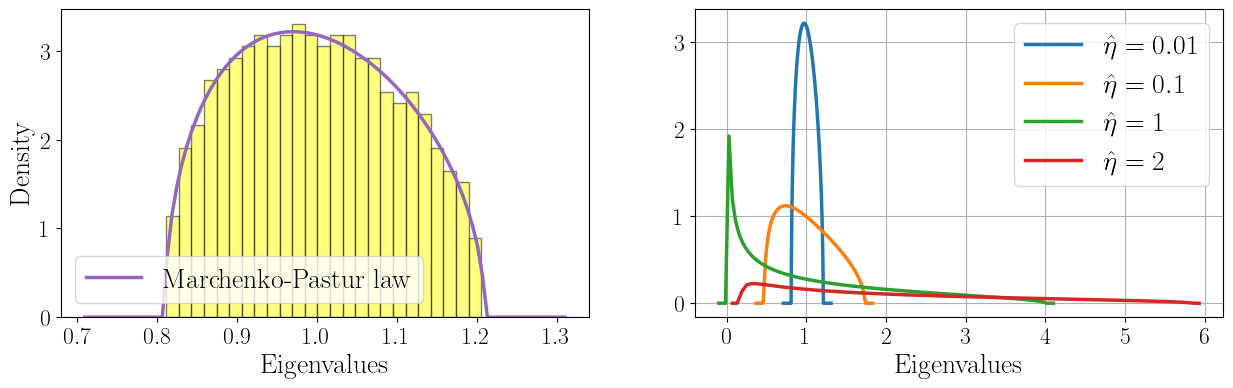

In [3]:
# Parameters
p = 500
n = 50000
X = np.random.randn(p, n)
eta = p / n 

# Covariance matrix
C = X @ X.T / n 

# edges
a = (1 - np.sqrt(eta))**2
b = (1 + np.sqrt(eta))**2
T = np.linspace(a - 0.1, b + 0.1, 100)

# eigenvalues
eigvals = np.linalg.eig(C)[0]

# Plotting
linewidth = 2.5
fontsize = 20
labelsize = 17

fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].hist(eigvals, color = 'yellow', density = True, bins=25, alpha=.5, edgecolor = 'black' )
# Marcenko-pastur
res = []
for t in T:
    res.append(marcenko_pastur(t, eta, a, b))
ax[0].plot(T, res, color = 'tab:purple', linewidth = 2.5, label = 'Marchenko-Pastur law')
ax[0].legend(fontsize = fontsize)
ax[0].tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax[0].tick_params(axis = 'y', which = 'both', labelsize = labelsize)
ax[0].set_ylabel('Density', fontsize = fontsize)
ax[0].set_xlabel('Eigenvalues', fontsize = fontsize)

# Second plot
etas = [0.01, 0.1, 1, 2]
for eta in etas:
    a = (1 - np.sqrt(eta))**2
    b = (1 + np.sqrt(eta))**2
    T = np.linspace(a - 0.1, b + 0.1, 100)
    res = []  
    for t in T:
        res.append(marcenko_pastur(t, eta, a, b))
    ax[1].plot(T, res, linewidth = 2.5, label = f'$ \hat \eta = {eta}$')
    ax[1].legend(fontsize = fontsize)
    ax[1].tick_params(axis = 'x', which = 'both', labelsize = labelsize)
    ax[1].tick_params(axis = 'y', which = 'both', labelsize = labelsize)
ax[1].legend(fontsize = fontsize)
ax[1].grid()
ax[1].set_xlabel('Eigenvalues', fontsize = fontsize)

path = './study-plot' + f'/marcenko-pastur-n-{n}-p-{p}.pdf'
fig.savefig(path, bbox_inches='tight')

## Squeezing and puting in wrapfig

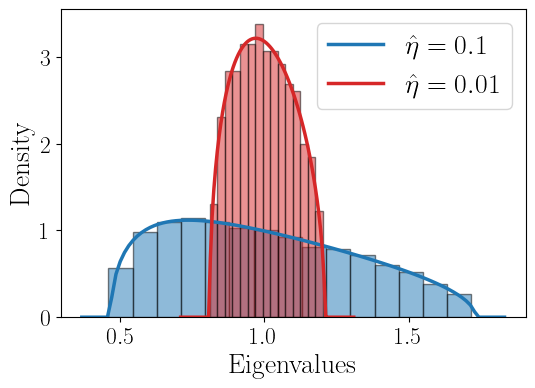

In [11]:
# Parameters
p = 500

# Plotting
linewidth = 2.5
fontsize = 20
labelsize = 17

fig, ax = plt.subplots(figsize = (6, 4))
ns = [5000, 50000]
colors = ['tab:blue', 'tab:red']

for i, n in enumerate(ns):
    X = np.random.randn(p, n)
    eta = p / n 

    # Covariance matrix
    C = X @ X.T / n 

    # edges
    a = (1 - np.sqrt(eta))**2
    b = (1 + np.sqrt(eta))**2
    T = np.linspace(a - 0.1, b + 0.1, 100)

    # eigenvalues
    eigvals = np.linalg.eig(C)[0]

    # Distribution
    ax.hist(eigvals, color = colors[i], bins = 15 ,density = True, alpha=.5, edgecolor = 'black' )

    # Marcenko-pastur
    res = []
    for t in T:
        res.append(marcenko_pastur(t, eta, a, b))
    #ax.plot(T, res, color = 'tab:purple', linewidth = 2.5, label = 'Marchenko-Pastur law')
    ax.plot(T, res, color = colors[i], linewidth = linewidth, label = f'$\hat \eta = {eta}$')
    ax.legend(fontsize = fontsize)
    ax.tick_params(axis = 'x', which = 'both', labelsize = labelsize)
    ax.tick_params(axis = 'y', which = 'both', labelsize = labelsize)
    ax.set_ylabel('Density', fontsize = fontsize)
    ax.set_xlabel('Eigenvalues', fontsize = fontsize)
    
path = './study-plot' + f'/marcenko-pastur-n-{n}-p-{p}-small.pdf'
fig.savefig(path, bbox_inches='tight')

## Evolution of Deltas with p and n

100%|██████████| 50/50 [00:00<00:00, 39213.76it/s]


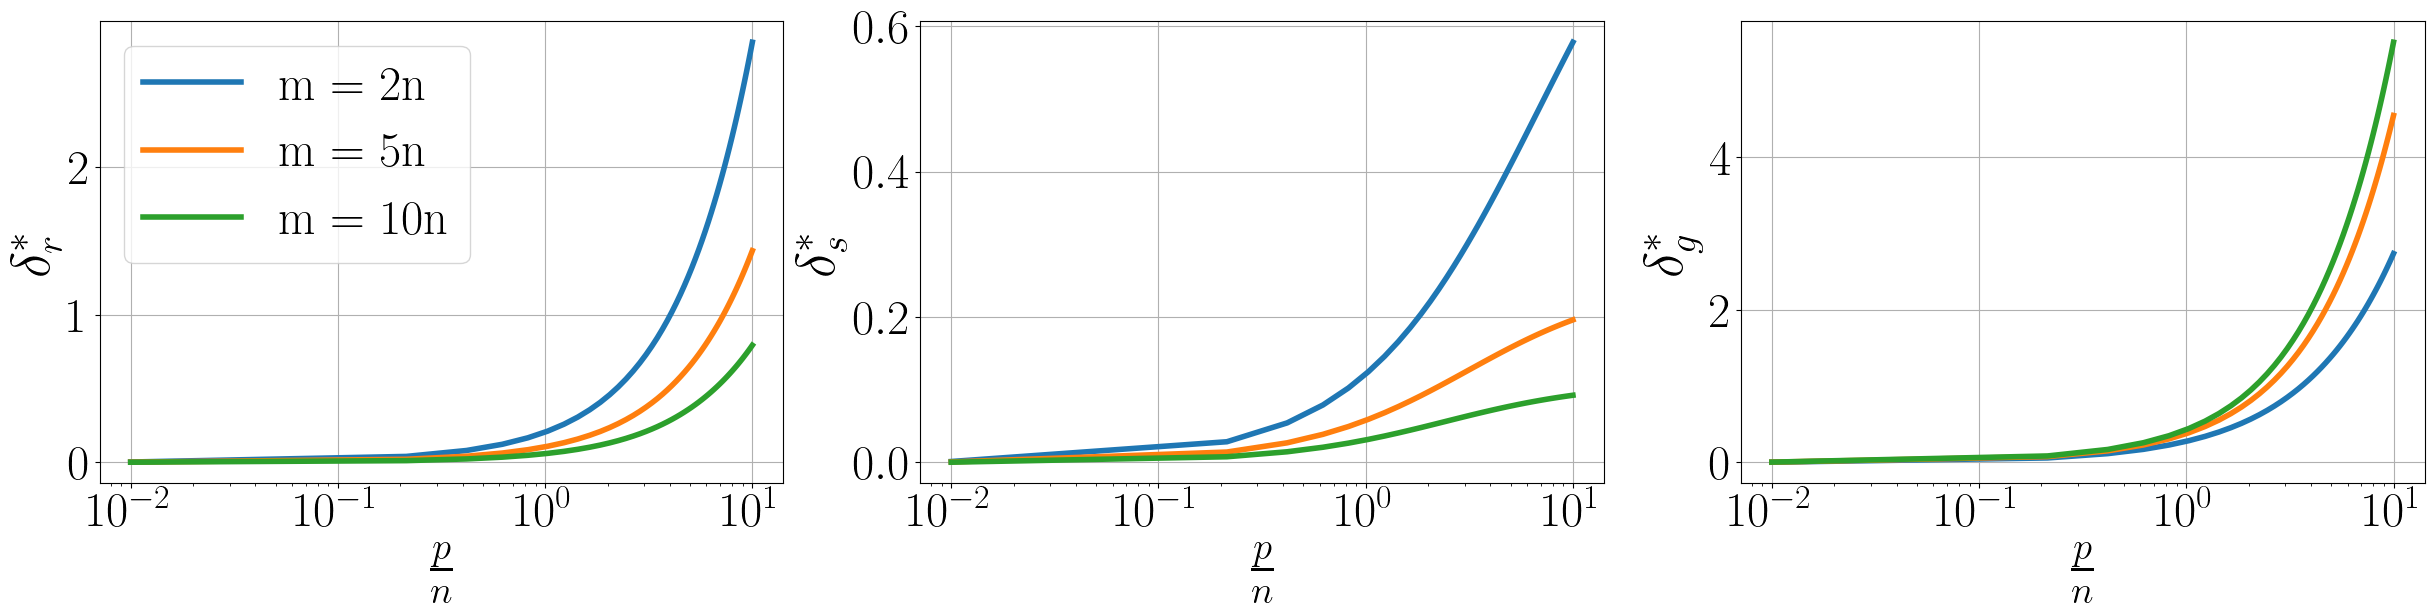

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex": True,"font.family": "STIXGeneral"})#,"font.sans-serif": "Helvetica",})
from rmt_results import *
from tqdm.auto import tqdm

# Parameters
n = 1000
n_hat = n
#m = 5000
epsilon = .2
rho = .2
phi = .9
gamma = 1

ps = np.linspace(n // 100, n * 10, 50)

fig, ax = plt.subplots(1, 3, figsize = (30, 6))
#plt.style.use('default')

fontsize = 40
labelsize = 35
linewidth = 4
etas = ps / n
ms = [2*n, 5*n, 10*n]
for m in ms:
    deltas = []
    deltas_s = []
    deltas_bar = []
    for p in tqdm(ps):
        p = int(p)
        delta, delta_s, delta_bar = Delta_bars(n, n_hat, m, p, epsilon, rho, phi, gamma)
        deltas.append(delta)
        deltas_s.append(delta_s)
        deltas_bar.append(delta_bar)



    ax[0].semilogx(etas, deltas, linewidth = linewidth, label = f'm = {m//n}n')
    ax[0].set_ylabel('$\delta_r^* $', fontsize = fontsize)
    ax[0].set_xlabel('$\\frac{p}{n}$', fontsize = fontsize)
    ax[0].tick_params(axis = 'x', which = 'both', labelsize = labelsize)
    ax[0].tick_params(axis = 'y', which = 'both', labelsize = labelsize)
    ax[0].grid(True)
    ax[0].legend(fontsize = labelsize )

    ax[1].semilogx(etas, deltas_s, linewidth = linewidth, label = f'm = {m//n}n')
    ax[1].set_ylabel('$\delta_s^* $', fontsize = fontsize)
    ax[1].set_xlabel('$\\frac{p}{n}$', fontsize = fontsize)
    ax[1].tick_params(axis = 'x', which = 'both', labelsize = labelsize)
    ax[1].tick_params(axis = 'y', which = 'both', labelsize = labelsize)
    ax[1].grid(True)
    #ax[1].legend(fontsize = labelsize)

    ax[2].semilogx(etas, deltas_bar, linewidth = linewidth, label = f'm = {m//n}n')
    ax[2].set_ylabel('$\delta_g^* $', fontsize = fontsize)
    ax[2].set_xlabel('$\\frac{p}{n}$', fontsize = fontsize)
    ax[2].tick_params(axis = 'x', which = 'both', labelsize = labelsize)
    ax[2].tick_params(axis = 'y', which = 'both', labelsize = labelsize)
    ax[2].grid(True)
    #ax[2].legend(fontsize = labelsize)

path = f'./results-plot/delta_with_eta-n-{n}-epsilon-{epsilon}-rho-{rho}-phi-{phi}-gamma-{gamma}.pdf'
fig.savefig(path, bbox_inches='tight')